In [78]:
#1. Loading Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns


In [80]:
# Load the data
df = pd.read_csv('learning_data(learning_data).csv')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nData types:")
print(df.dtypes)

Dataset shape: (200, 10)

Data types:
student_id                object
age                        int64
gender                    object
course_type               object
session_count              int64
avg_session_duration     float64
quiz_attempts              int64
assignments_submitted      int64
satisfaction_rating        int64
dropout                    int64
dtype: object


In [82]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
student_id               0
age                      0
gender                   0
course_type              0
session_count            0
avg_session_duration     0
quiz_attempts            0
assignments_submitted    0
satisfaction_rating      0
dropout                  0
dtype: int64


# As there were no missing values, no need to handle those.

In [85]:
print("\nData overview:")
print(df.describe())


Data overview:
              age  session_count  avg_session_duration  quiz_attempts  \
count  200.000000     200.000000            200.000000     200.000000   
mean    27.850000      14.415000             59.160200       4.320000   
std      6.422127       8.898804             31.797223       2.865073   
min     18.000000       0.000000              7.310000       0.000000   
25%     22.000000       6.750000             30.850000       2.000000   
50%     27.500000      15.000000             58.160000       4.000000   
75%     33.000000      22.000000             87.230000       7.000000   
max     39.000000      29.000000            118.850000       9.000000   

       assignments_submitted  satisfaction_rating     dropout  
count             200.000000           200.000000  200.000000  
mean                2.380000             3.090000    0.485000  
std                 1.720582             1.411332    0.501029  
min                 0.000000             1.000000    0.000000  
25%   

In [87]:
#check the distribution of categorical variables
print("\nCourse type distribution:")
print(df['course_type'].value_counts())

print("\nGender distribution:")
print(df['gender'].value_counts())

print("\nDropout distribution:")
print(df['dropout'].value_counts())


Course type distribution:
course_type
Digital Marketing    83
UI/UX                64
Python               53
Name: count, dtype: int64

Gender distribution:
gender
Male      94
Female    81
Other     25
Name: count, dtype: int64

Dropout distribution:
dropout
0    103
1     97
Name: count, dtype: int64


# Converting categorical variables using onehot encoding

In [20]:
categorical_features = ['gender', 'course_type']
numerical_features = ['age', 'session_count', 'avg_session_duration', 
                     'quiz_attempts', 'assignments_submitted', 'satisfaction_rating']

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X = df.drop(['student_id', 'dropout'], axis=1)
y = df['dropout']

X_processed = preprocessor.fit_transform(X)

ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
categorical_feature_names = []
for i, feature in enumerate(categorical_features):
    categories = list(ohe.categories_[i][1:])  # Skip first category since we used drop='first'
    categorical_feature_names.extend([f"{feature}_{category}" for category in categories])

all_feature_names = numerical_features + categorical_feature_names

X_processed_df = pd.DataFrame(
    X_processed,
    columns=all_feature_names
)

print("\nProcessed data shape:", X_processed_df.shape)
print("\nFirst 5 rows of processed data:")
print(X_processed_df.head())


Processed data shape: (200, 10)

First 5 rows of processed data:
        age  session_count  avg_session_duration  quiz_attempts  \
0 -0.600994      -0.384722              1.543930       0.937751   
1  1.428337      -0.610036              0.011029      -0.461877   
2  0.647825       0.065904              0.712846      -0.461877   
3  0.023415      -0.835349             -1.082685      -0.111970   
4 -0.444892      -1.060662             -1.010485       0.937751   

   assignments_submitted  satisfaction_rating  gender_Male  gender_Other  \
0               1.526562             1.356727          1.0           0.0   
1              -0.804067            -1.484586          1.0           0.0   
2               0.361247            -1.484586          1.0           0.0   
3               0.943905            -1.484586          0.0           0.0   
4              -0.804067             0.646399          0.0           0.0   

   course_type_Python  course_type_UI/UX  
0                 0.0          

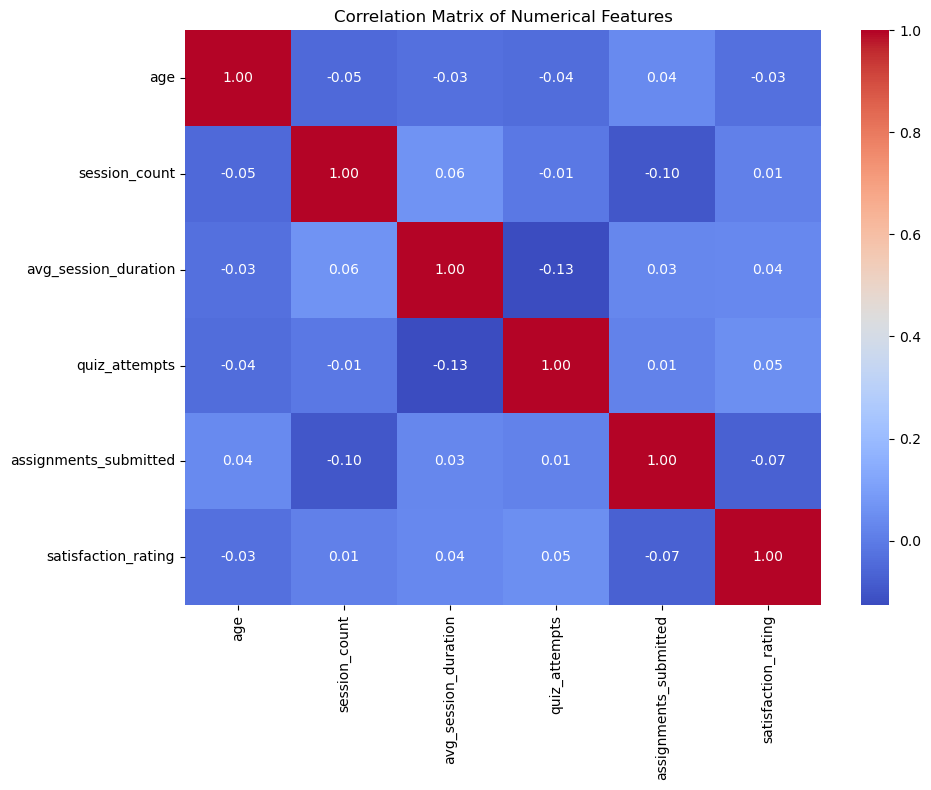

In [22]:
# Visualize the correlation matrix for the numeric features
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.savefig('correlation_matrix.png')

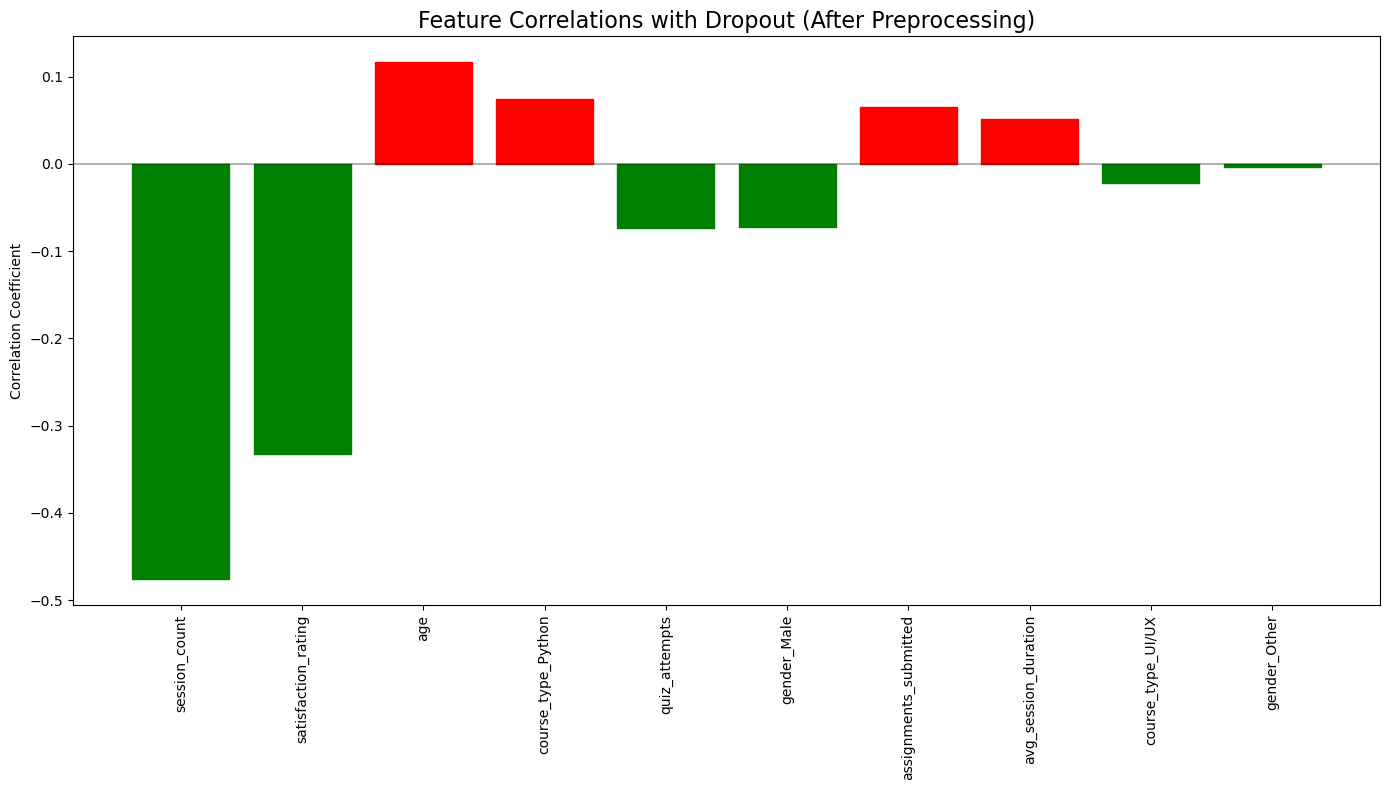

In [30]:
correlations = {}
for feature in X_processed_df.columns:
    corr = np.corrcoef(X_processed_df[feature], y)[0, 1]
    correlations[feature] = corr

# Sorting correlations by absolute value
sorted_correlations = {k: v for k, v in sorted(correlations.items(), 
                                              key=lambda item: abs(item[1]), 
                                              reverse=True)}

# Visualizing correlations with target
plt.figure(figsize=(14, 8))
bars = plt.bar(sorted_correlations.keys(), sorted_correlations.values())

for i, bar in enumerate(bars):
    if sorted_correlations[list(sorted_correlations.keys())[i]] > 0:
        bar.set_color('red')  # Positive correlation with dropout
    else:
        bar.set_color('green')  # Negative correlation with dropout

plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.title('Feature Correlations with Dropout (After Preprocessing)', fontsize=16)
plt.xticks(rotation=90)
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.savefig('feature_correlations_processed.png')
plt.show()


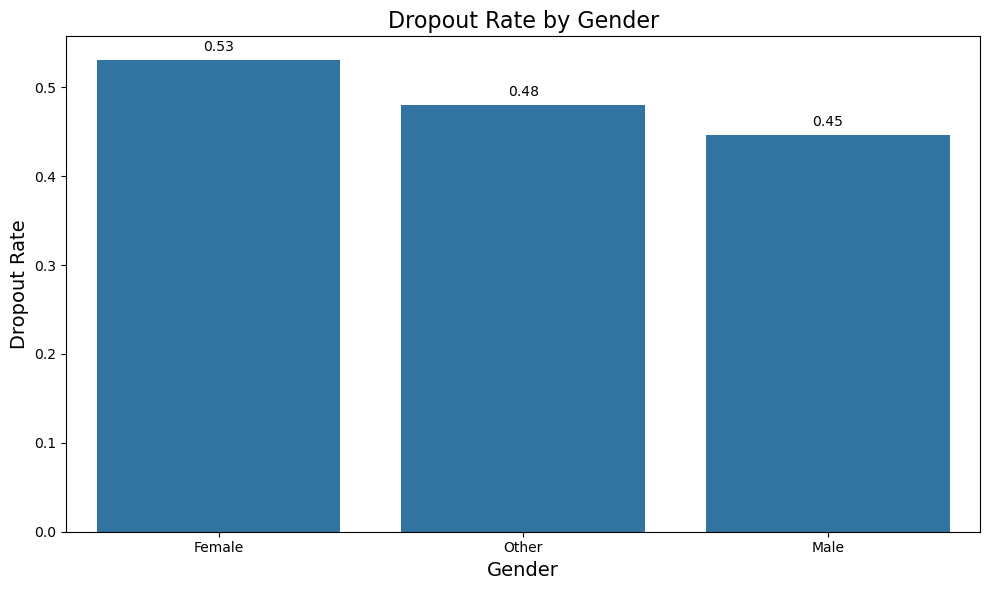

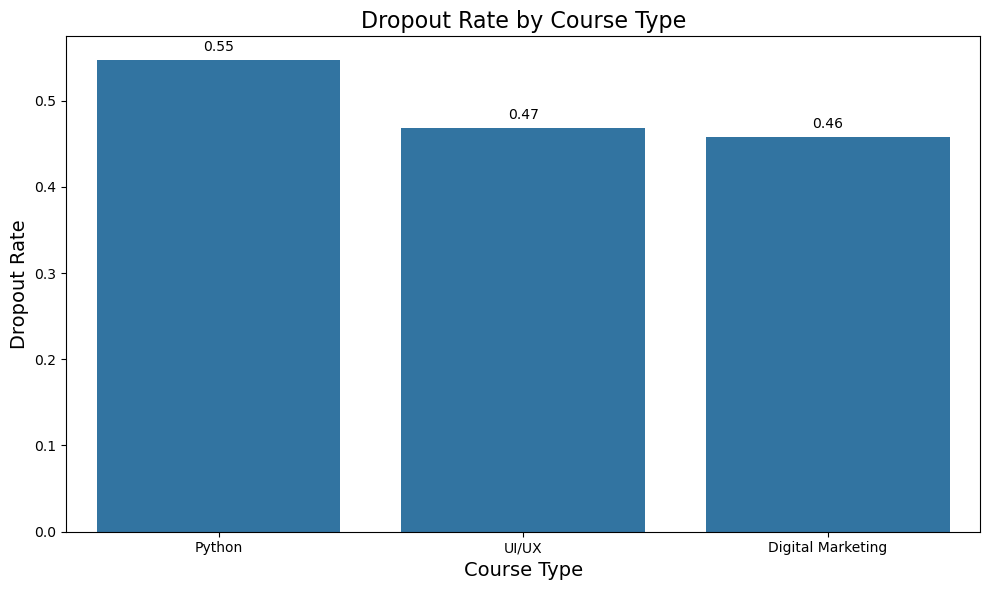

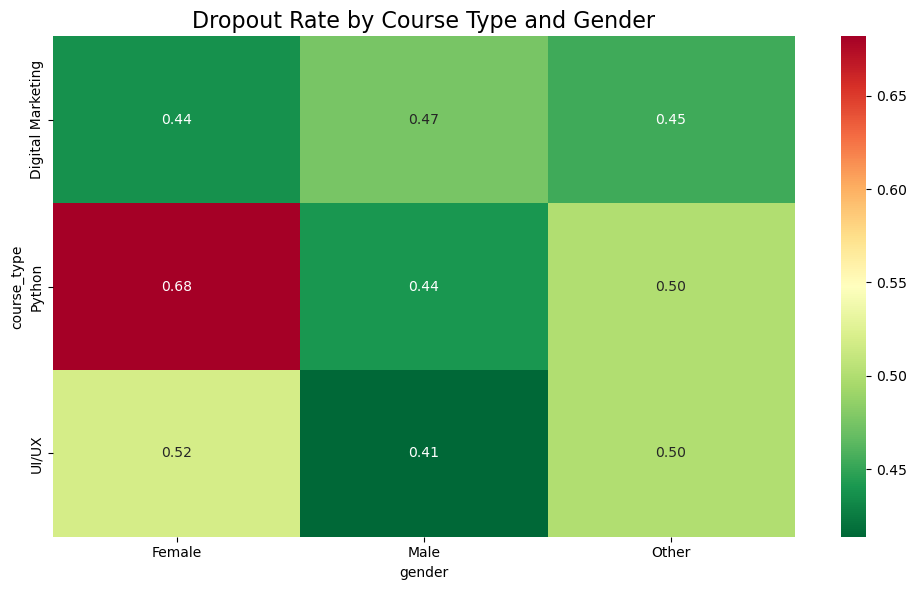

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.figure(figsize=(10, 6))
gender_dropout = df.groupby('gender')['dropout'].mean().sort_values(ascending=False)
ax = sns.barplot(x=gender_dropout.index, y=gender_dropout.values)
plt.title('Dropout Rate by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Dropout Rate', fontsize=14)
for i, v in enumerate(gender_dropout.values):
    ax.text(i, v + 0.01, f'{v:.2f}', ha='center')
plt.tight_layout()
plt.savefig('dropout_by_gender.png')
plt.show()

# Plotting dropout rates by course type
plt.figure(figsize=(10, 6))
course_dropout = df.groupby('course_type')['dropout'].mean().sort_values(ascending=False)
ax = sns.barplot(x=course_dropout.index, y=course_dropout.values)
plt.title('Dropout Rate by Course Type', fontsize=16)
plt.xlabel('Course Type', fontsize=14)
plt.ylabel('Dropout Rate', fontsize=14)
for i, v in enumerate(course_dropout.values):
    ax.text(i, v + 0.01, f'{v:.2f}', ha='center')
plt.tight_layout()
plt.savefig('dropout_by_course_type.png')
plt.show()

# Creating a heatmap showing dropout rates by course type and gender
plt.figure(figsize=(10, 6))
heatmap_data = pd.crosstab(
    index=df['course_type'],
    columns=df['gender'],
    values=df['dropout'],
    aggfunc='mean'
)
sns.heatmap(heatmap_data, annot=True, cmap='RdYlGn_r', fmt='.2f')
plt.title('Dropout Rate by Course Type and Gender', fontsize=16)
plt.tight_layout()
plt.savefig('dropout_by_course_gender.png')
plt.show()

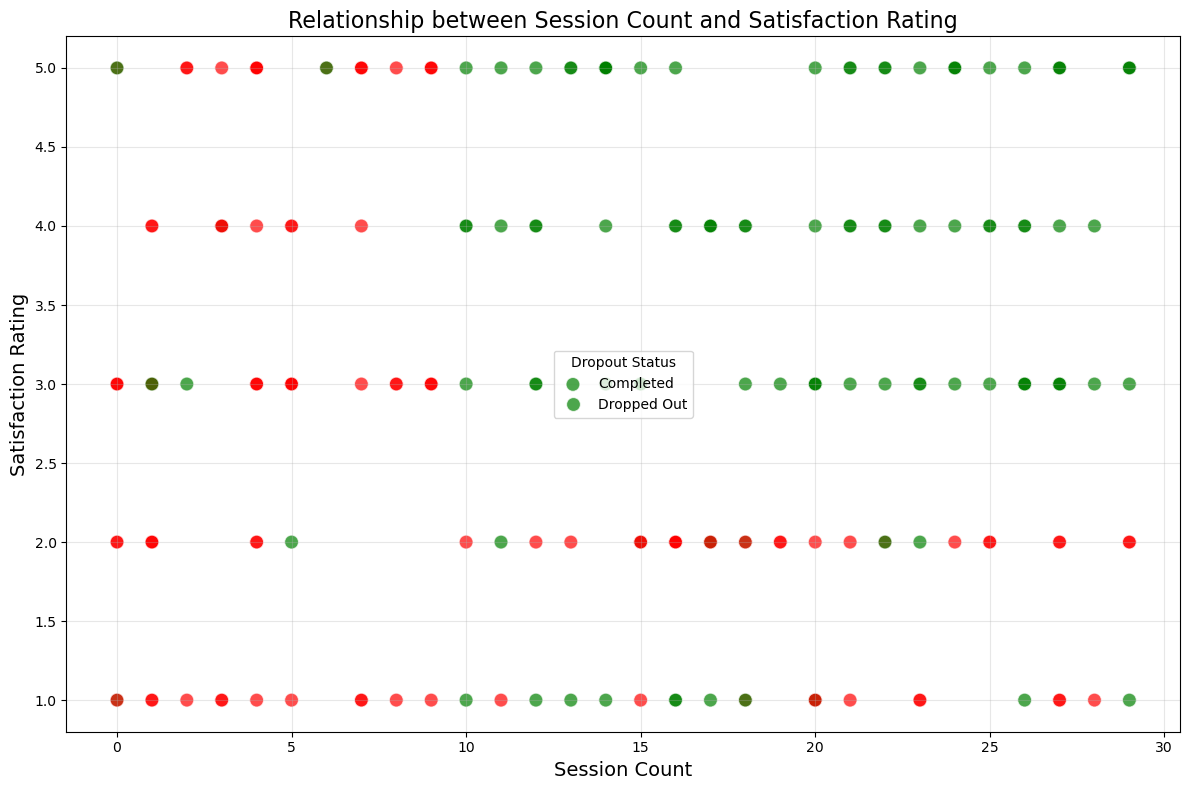

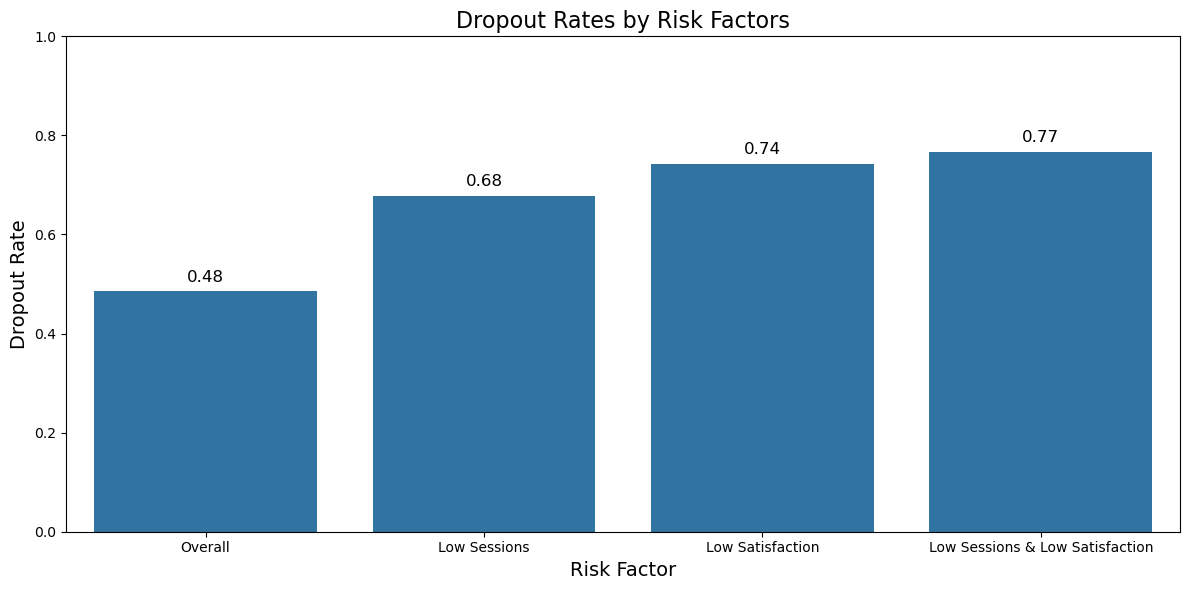

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Visualize relationship between session count and satisfaction rating with dropout
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df, 
    x='session_count', 
    y='satisfaction_rating', 
    hue='dropout',
    palette={0: 'green', 1: 'red'},
    s=100,
    alpha=0.7
)
plt.title('Relationship between Session Count and Satisfaction Rating', fontsize=16)
plt.xlabel('Session Count', fontsize=14)
plt.ylabel('Satisfaction Rating', fontsize=14)
plt.legend(title='Dropout Status', labels=['Completed', 'Dropped Out'])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('session_satisfaction_dropout.png')
plt.show()

# Define thresholds for low session count and low satisfaction
session_threshold = df['session_count'].median()
satisfaction_threshold = df['satisfaction_rating'].median()

# Create flags for low values
df['low_sessions'] = (df['session_count'] < session_threshold).astype(int)
df['low_satisfaction'] = (df['satisfaction_rating'] < satisfaction_threshold).astype(int)

# Create a combined risk factor (both low sessions and low satisfaction)
df['combined_risk'] = df['low_sessions'] & df['low_satisfaction']

# Calculate dropout rates for different combinations
risk_groups = [
    ('Overall', df['dropout'].mean()),
    ('Low Sessions', df[df['low_sessions'] == 1]['dropout'].mean()),
    ('Low Satisfaction', df[df['low_satisfaction'] == 1]['dropout'].mean()),
    ('Low Sessions & Low Satisfaction', df[df['combined_risk'] == 1]['dropout'].mean())
]

# Plot the results
labels, values = zip(*risk_groups)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=list(labels), y=list(values))
plt.title('Dropout Rates by Risk Factors', fontsize=16)
plt.xlabel('Risk Factor', fontsize=14)
plt.ylabel('Dropout Rate', fontsize=14)
plt.ylim(0, 1)  # Set y-axis from 0 to 1 for percentage
# Add value labels on top of bars
for i, v in enumerate(values):
    ax.text(i, v + 0.02, f'{v:.2f}', ha='center', fontsize=12)
plt.tight_layout()
plt.savefig('dropout_by_risk_factors.png')
plt.show()



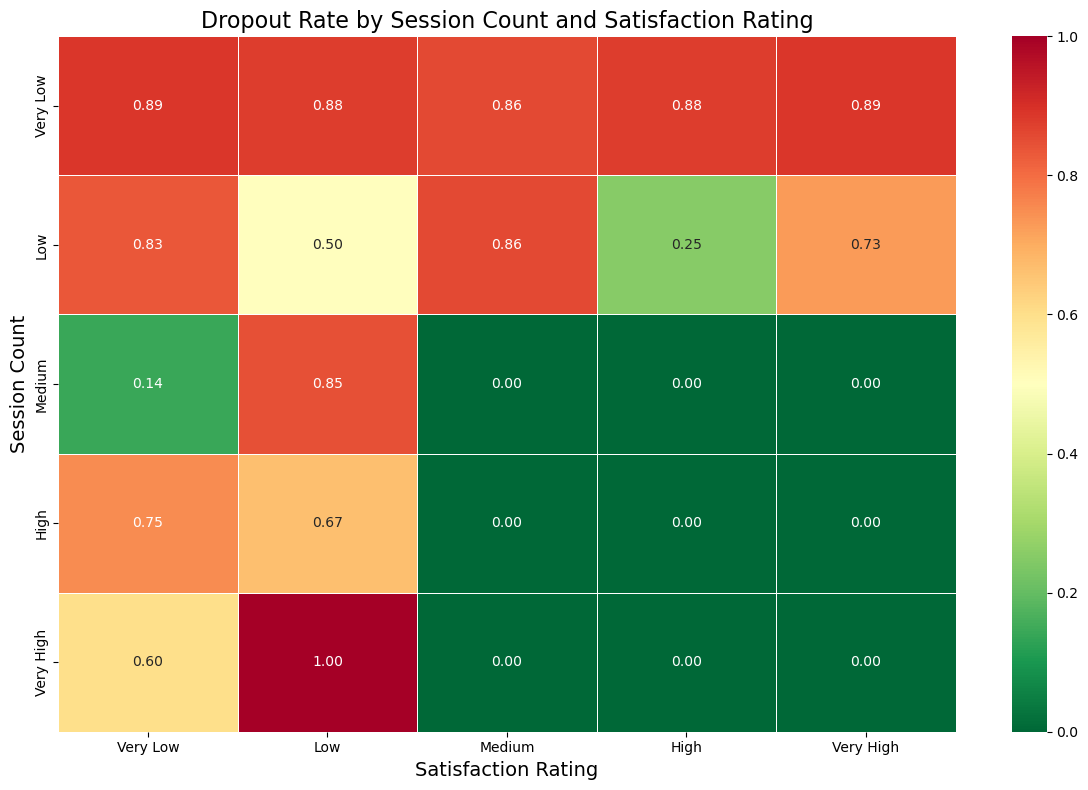

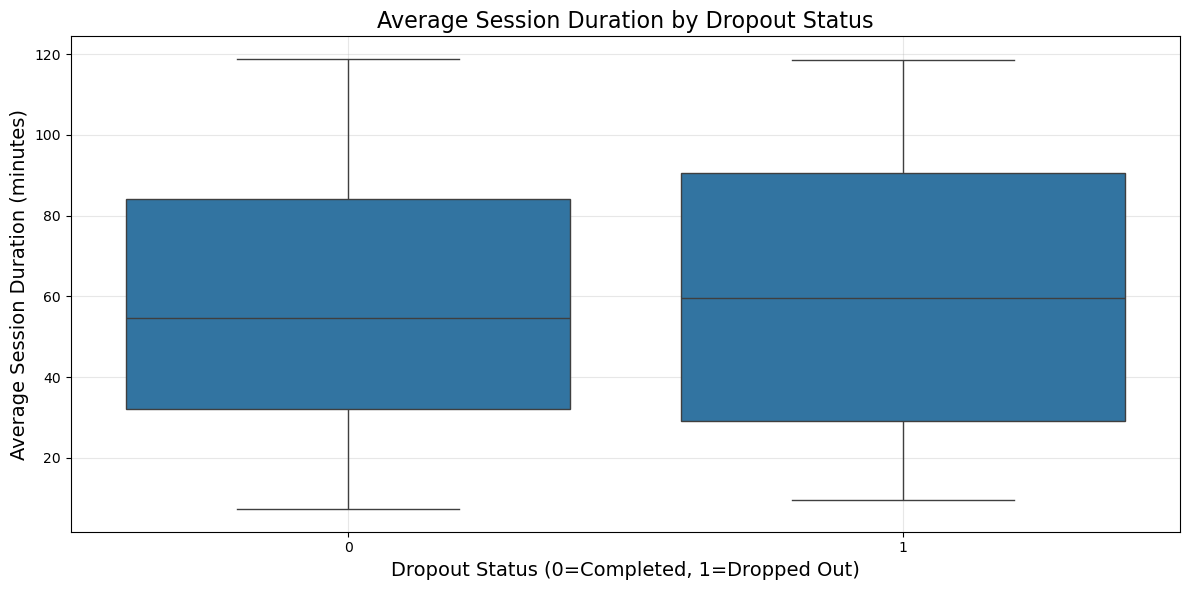

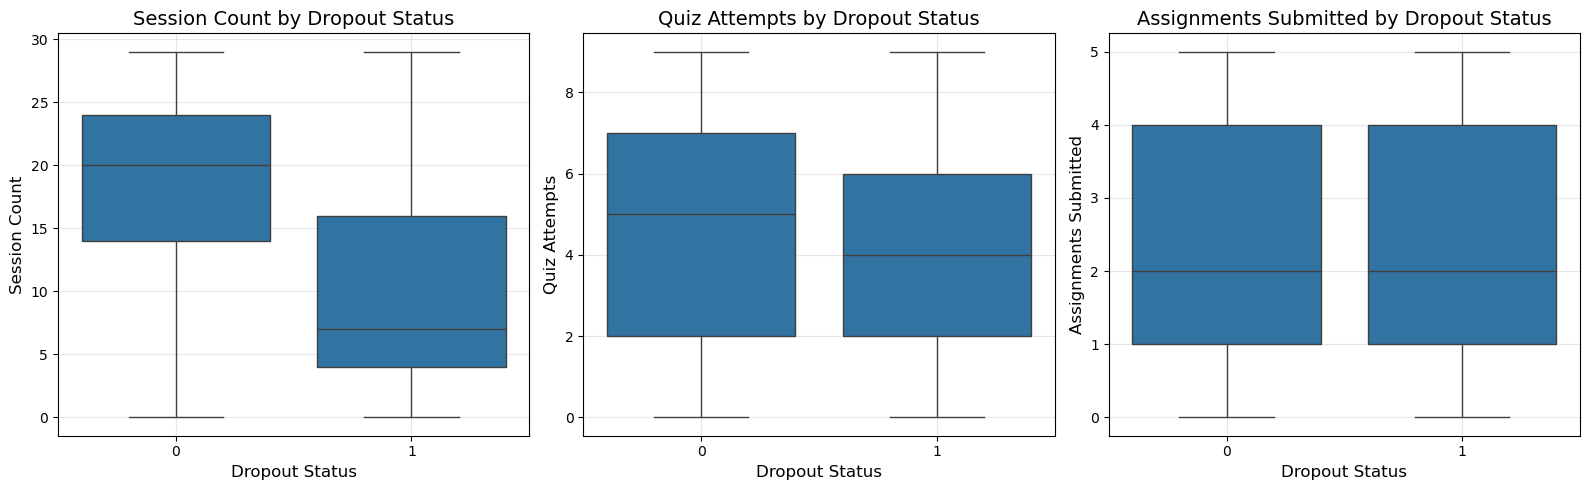

In [36]:
# Create a heatmap showing dropout rate by session count and satisfaction rating
# First create binned versions for better visualization
df['session_bins'] = pd.cut(df['session_count'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
df['satisfaction_bins'] = pd.cut(df['satisfaction_rating'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Create a crosstab for the heatmap
heatmap_data = pd.crosstab(
    index=df['session_bins'],
    columns=df['satisfaction_bins'],
    values=df['dropout'],
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='RdYlGn_r', fmt='.2f', linewidths=0.5)
plt.title('Dropout Rate by Session Count and Satisfaction Rating', fontsize=16)
plt.xlabel('Satisfaction Rating', fontsize=14)
plt.ylabel('Session Count', fontsize=14)
plt.tight_layout()
plt.savefig('dropout_heatmap_session_satisfaction.png')
plt.show()

# Let's check how average session duration relates to dropout
plt.figure(figsize=(12, 6))
sns.boxplot(x='dropout', y='avg_session_duration', data=df)
plt.title('Average Session Duration by Dropout Status', fontsize=16)
plt.xlabel('Dropout Status (0=Completed, 1=Dropped Out)', fontsize=14)
plt.ylabel('Average Session Duration (minutes)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('avg_session_duration_by_dropout.png')
plt.show()

# Examine engagement metrics: session_count, quiz_attempts, assignments_submitted
engagement_metrics = ['session_count', 'quiz_attempts', 'assignments_submitted']

plt.figure(figsize=(16, 5))
for i, metric in enumerate(engagement_metrics):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='dropout', y=metric, data=df)
    plt.title(f'{metric.replace("_", " ").title()} by Dropout Status', fontsize=14)
    plt.xlabel('Dropout Status', fontsize=12)
    plt.ylabel(metric.replace("_", " ").title(), fontsize=12)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('engagement_metrics_by_dropout.png')
plt.show()



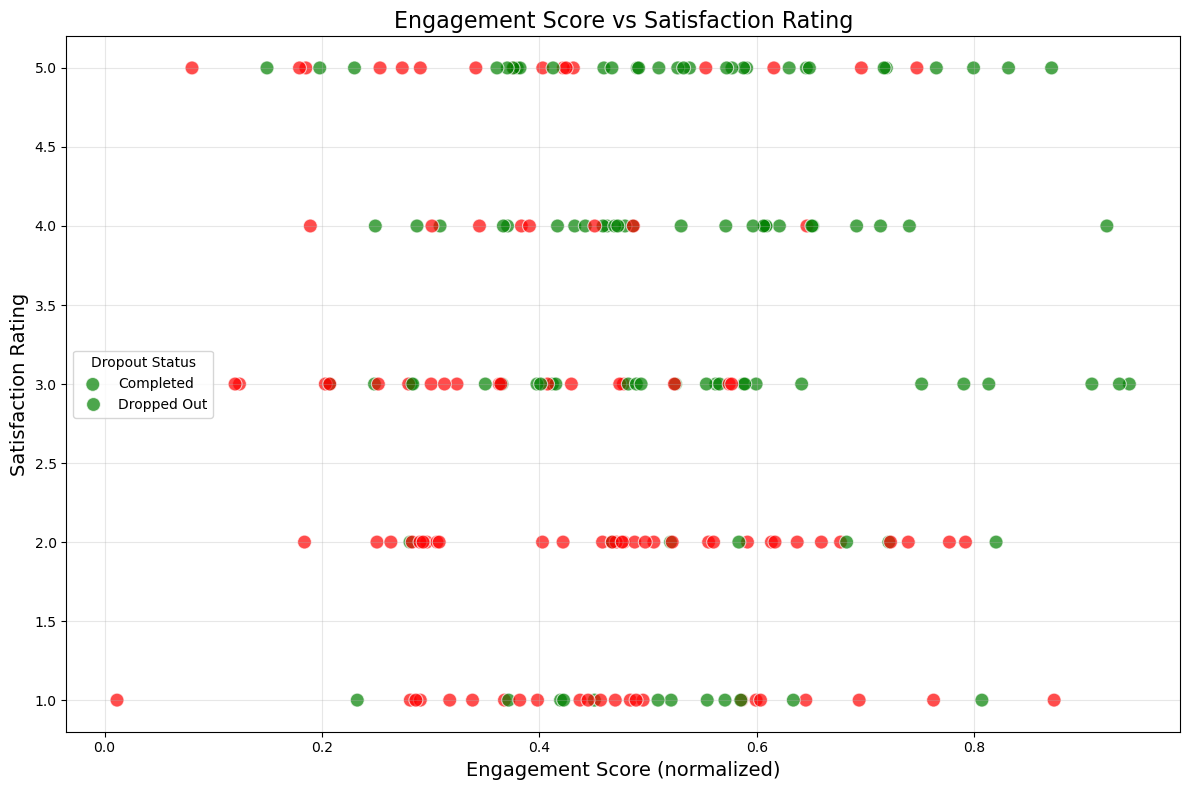

In [38]:
# Create an engagement score by combining metrics
df['engagement_score'] = (
    df['session_count'] / df['session_count'].max() +
    df['assignments_submitted'] / df['assignments_submitted'].max() +
    df['quiz_attempts'] / df['quiz_attempts'].max()
) / 3  # Scale between 0-1

# Plot engagement score vs satisfaction with dropout coloring
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df, 
    x='engagement_score', 
    y='satisfaction_rating', 
    hue='dropout',
    palette={0: 'green', 1: 'red'},
    s=100,
    alpha=0.7
)
plt.title('Engagement Score vs Satisfaction Rating', fontsize=16)
plt.xlabel('Engagement Score (normalized)', fontsize=14)
plt.ylabel('Satisfaction Rating', fontsize=14)
plt.legend(title='Dropout Status', labels=['Completed', 'Dropped Out'])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('engagement_satisfaction_dropout.png')
plt.show()

In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.25, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss')
}

# Lists to store results
cv_results = {}
test_results = {}
feature_importance = {}

# Cross-validation setup
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Train and evaluate models
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
    cv_results[name] = {
        'mean_roc_auc': cv_scores.mean(),
        'std_roc_auc': cv_scores.std()
    }
    print(f"Cross-validation ROC-AUC: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    
    # Train on full training set
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Evaluation metrics
    test_results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_prob)
    }
    
    # Store feature importance
    if name == 'Logistic Regression':
        feature_importance[name] = pd.DataFrame({
            'Feature': all_feature_names,
            'Coefficient': model.coef_[0]
        }).sort_values('Coefficient', ascending=False)
    else:
        feature_importance[name] = pd.DataFrame({
            'Feature': all_feature_names,
            'Importance': model.feature_importances_
        }).sort_values('Importance', ascending=False)
    
    # Print detailed metrics
    print(f"\n{name} Test Set Metrics:")
    print(f"Accuracy: {test_results[name]['accuracy']:.4f}")
    print(f"Precision: {test_results[name]['precision']:.4f}")
    print(f"Recall: {test_results[name]['recall']:.4f}")
    print(f"F1-Score: {test_results[name]['f1']:.4f}")
    print(f"ROC-AUC Score: {test_results[name]['roc_auc']:.4f}")
    
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    print("\nTop 5 Important Features:")
    print(feature_importance[name].head(5))



Training Logistic Regression...
Cross-validation ROC-AUC: 0.8227 ± 0.0370

Logistic Regression Test Set Metrics:
Accuracy: 0.8200
Precision: 0.8077
Recall: 0.8400
F1-Score: 0.8235
ROC-AUC Score: 0.8352

Confusion Matrix:
[[20  5]
 [ 4 21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82        25
           1       0.81      0.84      0.82        25

    accuracy                           0.82        50
   macro avg       0.82      0.82      0.82        50
weighted avg       0.82      0.82      0.82        50


Top 5 Important Features:
                 Feature  Coefficient
2   avg_session_duration     0.422053
0                    age     0.218142
7           gender_Other     0.028307
4  assignments_submitted     0.004533
3          quiz_attempts    -0.103005

Training Random Forest...
Cross-validation ROC-AUC: 0.8844 ± 0.0555

Random Forest Test Set Metrics:
Accuracy: 0.8600
Precision: 0.8214
Recall: 0.9200
F

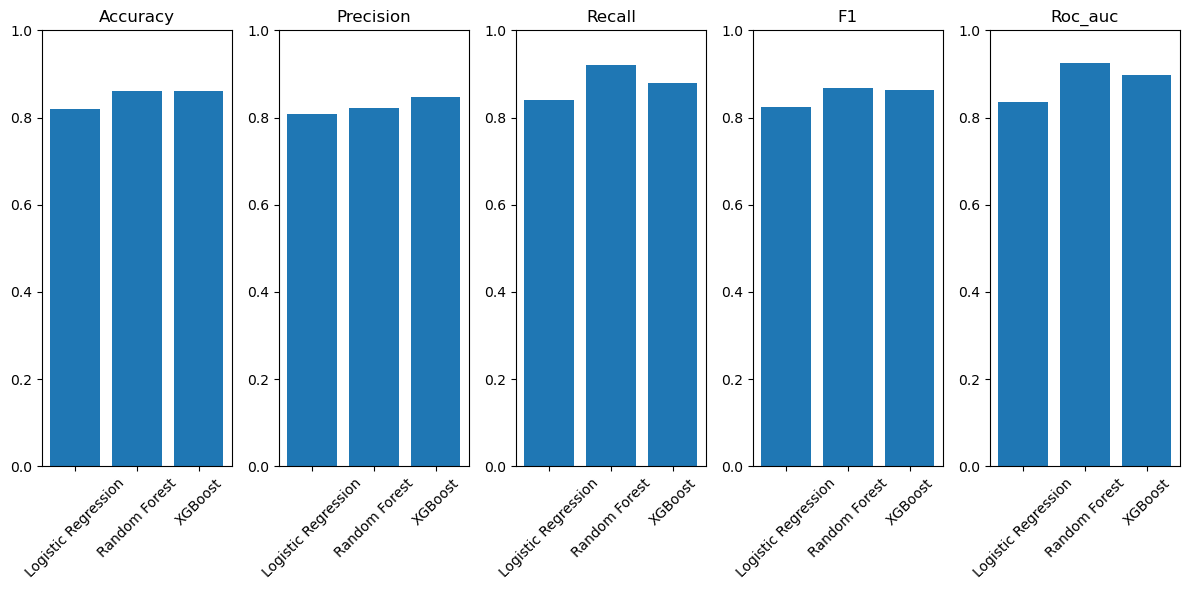

In [52]:
# Compare models with a bar chart
plt.figure(figsize=(12, 6))
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 5, i)
    values = [test_results[model][metric] for model in models]
    plt.bar(models.keys(), values)
    plt.title(metric.capitalize())
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

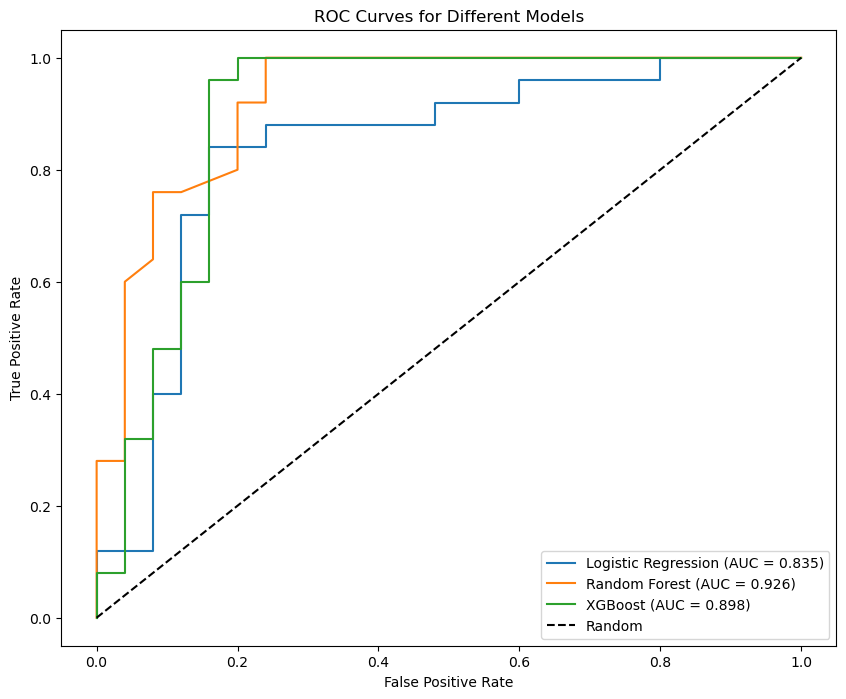

In [54]:
# ROC Curve comparison
plt.figure(figsize=(10, 8))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {test_results[name]["roc_auc"]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.show()

In [56]:
# Select the best model based on ROC-AUC
best_model_name = max(test_results, key=lambda x: test_results[x]['roc_auc'])
best_model = models[best_model_name]
print(f"\nBest performing model: {best_model_name}")


Best performing model: Random Forest



Generating SHAP values for model interpretability...


<Figure size 1200x800 with 0 Axes>

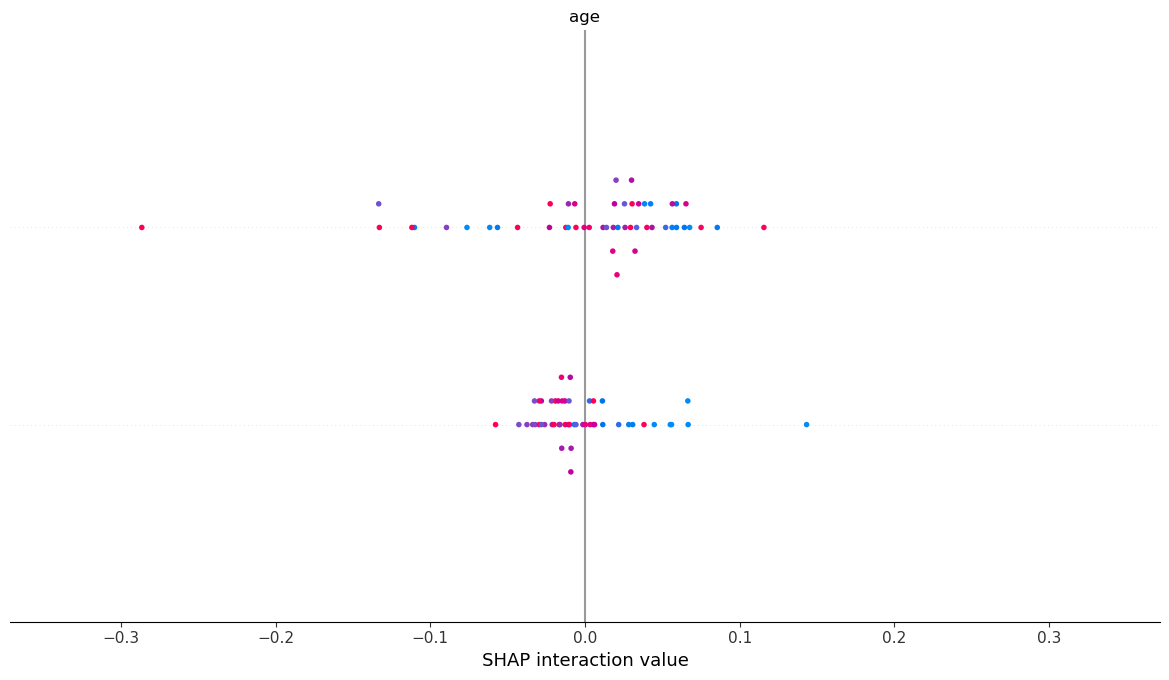

<Figure size 640x480 with 0 Axes>

In [68]:
# Model interpretability with SHAP
print("\nGenerating SHAP values for model interpretability...")
if best_model_name == 'XGBoost':
    explainer = shap.Explainer(best_model)
else:
    explainer = shap.Explainer(best_model, X_train)

shap_values = explainer(X_test, check_additivity=False)

# SHAP summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test, feature_names=all_feature_names)
plt.tight_layout()
plt.show()



In [74]:

# Identify high-risk students
test_df = pd.DataFrame(X_test, columns=all_feature_names)
test_df['dropout_probability'] = best_model.predict_proba(X_test)[:, 1]
test_df['actual_dropout'] = y_test.values.tolist()

# Define risk categories
test_df['risk_level'] = pd.cut(
    test_df['dropout_probability'], 
    bins=[0, 0.3, 0.7, 1], 
    labels=['Low', 'Medium', 'High']
)

print("\nStudent risk distribution:")
print(test_df['risk_level'].value_counts())

# Create a basic student engagement strategy based on insights
high_risk_features = feature_importance[best_model_name].head(5)['Feature'].tolist()
print("\nHigh-risk student profile:")
high_risk_students = test_df[test_df['risk_level'] == 'High']
for feature in all_feature_names:
    if feature in numerical_features:
        print(f"{feature}: {high_risk_students[feature].mean():.2f} (mean)")
    else:
        print(f"{feature}: {high_risk_students[feature].mean():.2f} (mean)")

print("\nEngagement strategy recommendations based on model insights will be printed below.\n")
# Suggest a basic student engagement strategy using predictions

# Strategy 1: Personalized Intervention for High-Risk Students
print("- Target all 'High' risk students with one-on-one mentoring and weekly check-ins.")
print("- Use their top influencing factors (e.g., low session count, poor quiz performance) to guide support focus.")

# Strategy 2: Automated Nudging System
print("- Send personalized SMS/email reminders before every session to High and Medium risk students.")
print("- Encourage quiz retakes and assignment resubmission with gamified incentives.")

# Strategy 3: Content Reinforcement
print("- Offer micro-learning modules for students with low average session duration.")
print("- Enable shorter, high-engagement content formats (e.g., 2-min recap videos).")

# Strategy 4: Social Learning Boost
print("- Group High-risk students with top-performing peers for collaborative tasks.")
print("- Launch peer-led mini-workshops targeting weak skill areas.")

# Strategy 5: Real-Time Dropout Risk Alerts
print("- Integrate model with live dashboards for instructors to monitor risk levels daily.")
print("- Trigger alerts when dropout probability crosses 0.7 threshold during the course.")

# Strategy 6: Incentive Ladder
print("- Offer badges or credits for increasing session consistency, quiz attempts, or assignment submissions.")
print("- Tie satisfaction feedback to personalized reward loops (e.g., Amazon vouchers, leaderboard features).")



Student risk distribution:
risk_level
Low       19
Medium    17
High      14
Name: count, dtype: int64

High-risk student profile:
age: 0.36 (mean)
session_count: -0.90 (mean)
avg_session_duration: 0.17 (mean)
quiz_attempts: -0.16 (mean)
assignments_submitted: -0.10 (mean)
satisfaction_rating: -0.01 (mean)
gender_Male: 0.43 (mean)
gender_Other: 0.14 (mean)
course_type_Python: 0.36 (mean)
course_type_UI/UX: 0.21 (mean)

Engagement strategy recommendations based on model insights will be printed below.

- Target all 'High' risk students with one-on-one mentoring and weekly check-ins.
- Use their top influencing factors (e.g., low session count, poor quiz performance) to guide support focus.
- Send personalized SMS/email reminders before every session to High and Medium risk students.
- Encourage quiz retakes and assignment resubmission with gamified incentives.
- Offer micro-learning modules for students with low average session duration.
- Enable shorter, high-engagement content format